# Supervised Learning: An Introduction

## Least-squares

The assumption is that $f(X) = E(Y|X)$ is linear.

We assume that $Y = E(Y|X) + \epsilon$

$$\hat{Y} = \hat{\beta_0} + \sum_{i=1}^n X_{i} \hat{\beta_j} = X^T \hat{\beta}$$

Where the $\beta_0$ term is the model *bias*. The gradient $f^\prime(X) = \beta$ is a vector in input space that points in the steepest uphill direction. To fit the model, a (simple) method is *least squares*. Here, we pick coefficients $\beta$ to minimize the residual sum of squares

$$RSS(\beta) = \sum_{i=1}^n (y_i - x_i^T \beta)^2$$

which shows a quadratic function of the parameters. Therefore, a minimum always exists but may not be unique. In matrix notation, 

$$RSS(\beta) = (y - X \beta)^T (y - X \beta)$$

where X is an $N \times p$ matrix with each row a sample, and y is an N-vector of the outputs in the training set. Differentiating w.r.t. $\beta$ we get the normal equations

$$X^T (y - X \beta) = 0$$

If $X^T X$ is nonsingular (i.e. invertible, $AB = BA = I$), then the unique solution is given by

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

Therefore, a solution for the best $\beta$ can be found without iteration.

A "poor man's" classifier can use linear regression and predict $1(\hat{Y} > 0.5)$. Ideally, we would like to estimate $P(Y=1|X=x)$

## Nearest neighbors

For regression, calculates average values of the $k$ nearest neighbors. This replaces the expected value (in normal regression) with the sample average. For classification, a majority vote is conducted.

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

If large number of variables, it'll require a larger number $k$.  If kept same, then smaller number of neighbors will be included (**Curse of dimensionality**). Increased number of features, the definition of the neighborhood will also have to expand.  The bias increases. This is because as you add another feature, it'll inherently make the points be further apart.

Also, as you increase $k$, a smoother surface will be formed (i.e. reduced variance).

The best $k$ can be found empirically.


## Bias-variance tradeoff

For a fixed $x_0$, 

$$E [\hat{f}(x_0) - f(x_0)] ^2 = E[ \hat{f}(x_0) - E\hat{f}(x_0) + E\hat{f}(x_0) - \hat{f}(x_0)]^2$$

$$= E[\hat{f}(x) - E\hat{f}(x_0)]^2 + [E\hat{f}(x_0) - f(x_0)]^2 + 2 E\hat{f}(x_0) - f(x_0) E[\hat{f}(x_0) - E\hat{f}(x_0)]$$

We know that $E[\hat{f}(x_0) - E\hat{f}(x_0)] = 0$. Therefore, 

$$Var(\hat{f}(x_0)) + bias(\hat{f}(x_0)^2$$

There is no bias if $k=1$ in nearest neighbor analysis. Small $k$ is small bias but high variance. Large $k$ is the summation over $n$ so benefiting from Variance (because for sample variance, there is a $\frac{1}{n}$ term) will be low but bias will be high.

## Linear regression vs. kNN

Linear regression has high bias (linear assumption can be violated) but only needs to estimate p+1 parameters.

kNN uses $\frac{n}{k}$ parameters but is flexible and adaptive. It is small bias but large variance.


# Linear Algebra Review

Matrix transpose: $A_{ij}^T = A_{ji}$ and $(AB)^T = B^T A^T$

Matrix (dot) product: $C = AB$

Identity matrix $I$ has a diagonal of ones and the rest zero.

Matrix inversion: $A^{-1} A = A A^{-1} =  I_n$

$$Ax = b$$

$$A^{-1} A x = A^{-1} b$$

$$I_n x = A^{-1} b$$

Invertability. We cannot invert a matrix if 1) more rows than columns or 2) more columns than rows, or 3) redundant rows ("linear dependence", "low rank")

Norms L^p norm: 

L2 norm (p=2) is mos often used. It is a distance. 

Eigendecomposition: $A v = \lambda v$

If $\lambda$ is eigenvalue of matrix $A$, there exists an eigenvector $V$ such that 

$$A = V diag(\lambda) V^{-1}$$

We can find $\lambda$ by $\lambda = \frac{V^T A V}{V^T V}$

Every real symmetric matrix has a real, orthogonal eigendecomposition $A = Q \Lambda Q^T$.

This will take two vectors on an $x_1, x_2$ space. When you multiply the matrix, on the direction of v_1, you scale it by $\lambda_1$. This stretches the space.


Trace: $Tr(A) = \sum_i A_{i,i}$

We can switch this around in any way.

$$Tr(ABC) = Tr(CAB) = Tr(BCA)$$

# Probability and Information Theory

A pdf must be contained s.t. $\forall x \in x, p(x) \geq 0$. Additionally, $\sum_{x\in x} p(x) = 1$ or $\int p(x) dx = 1$.

Computing a marginal probability with the **sum rule**

$$p(x) = \int p(x,y) dy$$


Conditional probability: $P(y=y, x=x) = \frac{P(y=y, x=x)}{P(x=x)}$

Chain rule of probability: $P(x_1, ..., x_n) = P(x_1) \pi_{i=1}^n P(x_i | x_1, ..., x_{(i-1)})$

$P(x_1, x_2, x_3) = P(x_1) P(x_2, x_3 | x_1) = P(x_1) p(x_2) p(x_3 | x_1, x_2)$


Independence: $p(x=x, y=y) = p(x=x)p(y=y)$

Expectation: $E_{x\sim P} [f(x)] = \sum_x P(x) f(x)$

Variance and covariance: $E(Z)^2 = Var(Z) + (E Z)^2$ where $Z=f(x) - E f(x)$

$Cov(X,Y) = E(XY) - EX EY$

F distribution is chi-squared divided by chi-squared


## Review of Conditional Expectation


The conditional expected value is just the expectation when X is specified. 

$$E(Y|X=x) = \int_{y} y dF(y|X=x) = \int_y y f_{y|X}(y|x) dy$$

Conditional expectation is a random variable. Without specificing $X=x$, $E(Y|X)$ is a function of $X$. Because $X$ is a RV, then $E(Y|X)$ is also RV.

Tower property: $E(Y) = E[E(Y|X)]$.

We say that $X$ takes a fixed value such as $x_0 = 0$, then $g(x_0)$ is **deterministic** (i.e. not random). Its form may be unknown, or involves unknown parameters, e.g.

**Example**

$Y = a X^2 + \epsilon$, $\epsilon$ ind $X$, $\epsilon \sim N(0,1)$

$E(Y|X) = E(c + X^2 + \epsilon | X) = c + X^2 + E(\epsilon|X) = c + X^2$ where $E(\epsilon|X)=0$

**Example**

$Y = X^2 + 10X + 20 + \epsilon$

where $\epsilon \sim N(0, 3)$ and $X \sim N(30,10)$

$$
\begin{bmatrix}
X\\
Y\\
\end{bmatrix} = N(
\begin{bmatrix}
\mu_x & \sigma_x^2 + \sigma_{xy}^2\\
\mu_y & \sigma_{xy} + \sigma_x^2
\end{bmatrix}
)
$$

In this case, we know the underlying probability model.

The joint distribution gives a lot of information!

We can evalaute for the best model $f$ by minimizing a loss function (i.e. $L(Y, f(X)) = Y - f(X))^2$)

$$EPE(f) = E L(Y, f(X)) = E(Y - f(X))^2 = \int [y - f(x)]^2 Pr(dx, dy)$$

Because we have assumed that we know the joint distribution (and it's all continuous), then we evaluate an integral.

**The best $f$ is E(Y|X=x)**

^ This depends on your loss function! (using squared loss!) If you use L1 then your best $f$ will be at the median. Squared loss is better because can take derivative of it. However, it can be influenced by extreme values. 

$$EPE(f) = E(Y - f(X))^2 = E[E[(Y - f(x)]^2 | X)]$$

Minimize $E[(Y - f(x)]^2 | X)$ for every X. This can be decomposed

$$E[(Y - f(x)]^2 | X) = E[[Y - E(Y|X) + E(Y|X) - f(X)]^2 | X]$$

With $A = Y - E(Y|X)$ and $B = E(Y|X) - f(X)$

$$= E(A^2 | X) + E(B^2 | X) + 2 E(A \times B | X)$$

We know that at a given $X$, $A \times B$ is a constant. 

$$ = [E[Y|X] - f(X)] [E(Y|X) E[Y|X]]$$

Therefore, $EPE(f) = EPE(E(Y|X)) + B$

If the population is known, then $f(x) = \int y f_{Y|X} (y|x) dy$ simply. This is the ideal case where you have population. However, this is rare.

For Example, if $Y$ is a known funtion of $X$ (with some error), then you know the conditional distribution. From this, you can estimate $f$ as the mean of that conditional distribution.

### Categorical classification

Loss matrix can be used to penalize categories heavier. 

For example, in stock market prediction, we may place a heavier scaler on the loss function for when the stock market 

Popular choice: $L = 1_{K \times K} - I_K$ forms a matrix of ones except for zeros in the diagonal (because no update should be made if it is correct). This can also be expressed as $L(G, \hat{G}(X)) = I(G \neq \hat{G}(X))$. 

The solution that minimizes the EPE is $\hat{G}(x) = arg max_g Pr_{G|X} (g|x)$. The group that maximizes the conditional probability $Pr_{G|X}(g|x)$. This is called the bayes classifier. Its error is called the bayes rate. The group has a prior (original) distribution. For example, increasing and decreasing is equally likely.  According to yesterday's information, update and calculate posterior probability $Pr_{G|X}(g|x)$.

**Example**

Generate $X|G \sim N(\mu_G, I_2)$ where two centers are defined: $\mu_1 = (0,1)^T, \mu_2 = (1,0)^T$

Because this was generated, we know the labels: $G_{1}, ..., G_{100} = 1$ and $G_{101}, ..., G_{200} = 2$. 

The bayes classifier is found by assuming the joint distribution $X|G \sim N(\mu_G, I_2)$. Therefore, each group is equally likely. The boundary between these two groups is found by 

$E(1(G|X)) = P(G=1|x_0) $ versus $P(G=2|X)$ and the larger one is chosen for the point.

At the beginning, $P(G=1) = P(G=2) = 0.5$. 

At a sample located at $\vec{X} = (10,9)$, the expectation can be evaluated by $P(G_j = 1 | x_0 = (10,9)) = f(x_0 = (10,9)) = \frac{f(x_0 = (10,9) | G=1)}{f_x( (10, 9) )}$

$f_{N(0,1})(x_0, x_1)}$ is the double normal distribution (a function of X2 and X1).

So plug in the likelihood of observing the X multiplied by the given distribution (per bayesian rule). Bayes rule finds the ratio of the joint probability 

$ = \frac{f(x_0 | \mu_1) \times P(G=1 | x_0)}{f(x_0 | \mu_1) \times P(G=1 | x_0) + f(x_0 | \mu_2) \times P(G=1 | x_0)}$

### Linear regression

$$RSS(\beta) = \sum_{i=1}^N (y_i - f(x_i))^2 = \sum_{i=1}^N (y_i - \beta_0 - \sum)^2$$

With a feature $p=1$, what is the estimated $\beta$?

Solution: Take the derivative and then set equal to zero. RSS will have a minimum.

$RSS(\beta_0, \beta_1) = y - X\beta$




**Exercise:** Suppose each of $K$-classes has an associated target $𝑡_𝑘$, which is a vector of
all zeros, except a one in the $k$th position. Show that classifying to the largest element of $\hat{y}$
amounts to choosing the closest target, $min_{k} ||t_k - \hat{y}||$, if the elements of $\hat{y}$ sum to one.

**Proof:** 

$$
T = \begin{bmatrix}

\end{bmatrix}
$$

where $t_k \in T$.


Equal set of points per class
 1    100
0    100
dtype: int64


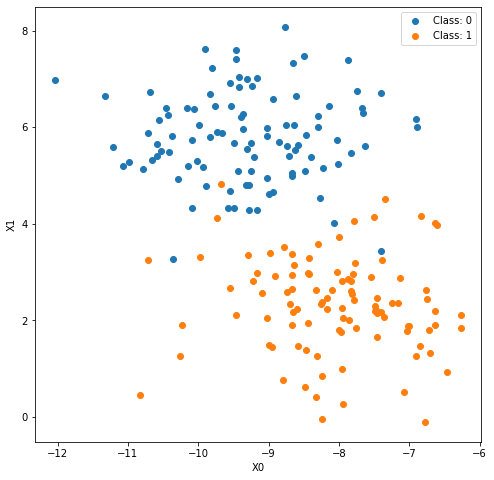

array([-12.52801629,  -3.56239247,  -2.90412878, -12.28710829,
         0.03638171,  -3.69897114, -15.68068774,  -5.29109045,
         1.73279073,  -9.56389529,  -3.91261051,  -7.77714045,
       -20.36512245, -13.86835129, -10.46041684, -11.53642131,
         2.28581322, -20.0824698 , -11.23063806, -13.23706341,
        -8.63109328, -24.75292263,  -7.20376479,  -2.32533403,
        -2.84058561,   2.9898612 , -11.33712585,  -5.31854411,
       -11.70858866,  -3.23172379,  -8.21273938, -11.05267593,
       -14.85659008, -10.79956758, -15.82075792,  -2.82563244,
         6.92284119,  -7.18854815, -14.80028888, -11.24504322,
       -10.03305471,   4.32640523,  -4.02833559,  -2.50864522,
        -4.06321913, -15.79993956,  -1.97854182, -11.94400958,
        -2.94197991,  -2.9554109 ,  -7.84252512,   4.78158277,
        -5.06642196,   0.7620665 ,  -6.38174487, -15.87146272,
        -1.83985641, -16.05808142, -11.64422887,  -1.73712784,
       -11.55502809,   0.49368146,  -8.9141197 ,  -4.47

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(34)

X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.)

print("Equal set of points per class\n", pd.Series(y).value_counts())

unique_classes = np.unique(y)

fig = plt.figure(figsize=(8,8))

for c in unique_classes:
    mask = y == c
    plt.scatter(X[mask,0], X[mask,1], label=f"Class: {c}")
plt.legend()
plt.xlabel("X0")
plt.ylabel("X1")
plt.rcParams.update({'font.size': 20})
plt.show()

# Add column of 1s to a version of X for classification
X_proc = np.append(np.ones([len(X), 1]), X, axis=1)

def f(X, B):
    return np.dot(X, B)

f(X_proc, [1,3,4])